In [7]:
import pandas as pd

# Load the datasets
try:
    train_df = pd.read_csv(r'train.csv')
    test_df = pd.read_csv(r'test.csv')
    print("Datasets loaded successfully!")
except FileNotFoundError:
    print("Make sure 'train.csv' and 'test.csv' are in the same directory as this notebook.")
    print("Please check your file paths and try again.")

Datasets loaded successfully!


In [8]:
print("Train DataFrame Head:")
print(train_df.head())

print("\nTest DataFrame Head:")
print(test_df.head())

Train DataFrame Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [9]:
print("\nTrain DataFrame Info:")
train_df.info()

print("\nTest DataFrame Info:")
test_df.info()


Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Test DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passe

In [10]:
print("\nTrain DataFrame Description (Numerical Columns):")
print(train_df.describe())

print("\nTest DataFrame Description (Numerical Columns):")
print(test_df.describe())


Train DataFrame Description (Numerical Columns):
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Test DataFrame Description (Nu

In [11]:
print("\nMissing values in Train DataFrame:")
print(train_df.isnull().sum())

print("\nMissing values in Test DataFrame:")
print(test_df.isnull().sum())


Missing values in Train DataFrame:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in Test DataFrame:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [13]:
# Create a copy to avoid SettingWithCopyWarning
train_df_cleaned = train_df.copy()
test_df_cleaned = test_df.copy()

# --- 1. Handle 'Cabin' Column ---
# Drop the 'Cabin' column due to too many missing values
train_df_cleaned = train_df_cleaned.drop('Cabin', axis=1)
test_df_cleaned = test_df_cleaned.drop('Cabin', axis=1)
print("Dropped 'Cabin' column from both dataframes.")

# --- 2. Handle 'Age' Column ---
# Impute missing 'Age' values with the median age
median_age_train = train_df_cleaned['Age'].median()
median_age_test = test_df_cleaned['Age'].median()

train_df_cleaned['Age'].fillna(median_age_train, inplace=True)
test_df_cleaned['Age'].fillna(median_age_test, inplace=True) # Use test median for test set, or train median for both
print(f"Filled missing 'Age' values in train_df with median: {median_age_train}")
print(f"Filled missing 'Age' values in test_df with median: {median_age_test}")


# --- 3. Handle 'Embarked' Column (only in train_df) ---
# Impute missing 'Embarked' values with the mode
most_frequent_embarked = train_df_cleaned['Embarked'].mode()[0]
train_df_cleaned['Embarked'].fillna(most_frequent_embarked, inplace=True)
print(f"Filled missing 'Embarked' values in train_df with mode: {most_frequent_embarked}")

# --- 4. Handle 'Fare' Column (only in test_df) ---
# Impute missing 'Fare' values with the median fare
median_fare_test = test_df_cleaned['Fare'].median()
test_df_cleaned['Fare'].fillna(median_fare_test, inplace=True)
print(f"Filled missing 'Fare' values in test_df with median: {median_fare_test}")

# Verify no more missing values (or significantly fewer)
print("\nMissing values after cleaning (Train DataFrame):")
print(train_df_cleaned.isnull().sum())
print("\nMissing values after cleaning (Test DataFrame):")
print(test_df_cleaned.isnull().sum())

Dropped 'Cabin' column from both dataframes.
Filled missing 'Age' values in train_df with median: 28.0
Filled missing 'Age' values in test_df with median: 27.0
Filled missing 'Embarked' values in train_df with mode: S
Filled missing 'Fare' values in test_df with median: 14.4542

Missing values after cleaning (Train DataFrame):
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Missing values after cleaning (Test DataFrame):
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15596\3063726576.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_cleaned['Age'].fillna(median_age_train, inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15596\3063726576.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [14]:
# Create FamilySize feature
train_df_cleaned['FamilySize'] = train_df_cleaned['SibSp'] + train_df_cleaned['Parch'] + 1
test_df_cleaned['FamilySize'] = test_df_cleaned['SibSp'] + test_df_cleaned['Parch'] + 1
print("Created 'FamilySize' feature.")

# Create IsAlone feature
# This indicates if a passenger was traveling alone
train_df_cleaned['IsAlone'] = (train_df_cleaned['FamilySize'] == 1).astype(int)
test_df_cleaned['IsAlone'] = (test_df_cleaned['FamilySize'] == 1).astype(int)
print("Created 'IsAlone' feature.")

# Let's inspect the new features
print("\nTrain DataFrame with new features (head):")
print(train_df_cleaned[['SibSp', 'Parch', 'FamilySize', 'IsAlone', 'Survived']].head())

Created 'FamilySize' feature.
Created 'IsAlone' feature.

Train DataFrame with new features (head):
   SibSp  Parch  FamilySize  IsAlone  Survived
0      1      0           2        0         0
1      1      0           2        0         1
2      0      0           1        1         1
3      1      0           2        0         1
4      0      0           1        1         0


In [15]:
# --- 1. Encode 'Sex' Column ---
train_df_cleaned = pd.get_dummies(train_df_cleaned, columns=['Sex'], drop_first=True, dtype=int)
test_df_cleaned = pd.get_dummies(test_df_cleaned, columns=['Sex'], drop_first=True, dtype=int)
print("One-hot encoded 'Sex' column (dropped 'Sex_female').") # 'Sex_male' will be 1 for male, 0 for female

# --- 2. Encode 'Embarked' Column ---
train_df_cleaned = pd.get_dummies(train_df_cleaned, columns=['Embarked'], drop_first=True, dtype=int)
test_df_cleaned = pd.get_dummies(test_df_cleaned, columns=['Embarked'], drop_first=True, dtype=int)
print("One-hot encoded 'Embarked' column (dropped 'Embarked_S').")

# Drop 'Name' and 'Ticket' as they are generally not useful for direct modeling (unless using NLP)
train_df_cleaned = train_df_cleaned.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
# For the test set, we need to keep PassengerId for submission, but drop Name and Ticket
test_passenger_ids = test_df_cleaned['PassengerId'] # Save PassengerId for potential submission later
test_df_cleaned = test_df_cleaned.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

print("Dropped 'Name', 'Ticket', and 'PassengerId' (from train_df_cleaned) columns.")

# Display the updated dataframes info to see new columns and types
print("\nTrain DataFrame Info after transformations:")
train_df_cleaned.info()

print("\nTest DataFrame Info after transformations:")
test_df_cleaned.info()

One-hot encoded 'Sex' column (dropped 'Sex_female').
One-hot encoded 'Embarked' column (dropped 'Embarked_S').
Dropped 'Name', 'Ticket', and 'PassengerId' (from train_df_cleaned) columns.

Train DataFrame Info after transformations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   FamilySize  891 non-null    int64  
 7   IsAlone     891 non-null    int64  
 8   Sex_male    891 non-null    int64  
 9   Embarked_Q  891 non-null    int64  
 10  Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB

Test DataFrame Info after transformations:
<class 'pandas.core.frame.DataFram

In [16]:
# Align columns - crucial for consistent model input
# Get all columns from the training set (excluding 'Survived')
train_cols = train_df_cleaned.columns.drop('Survived')

# Reindex test_df_cleaned to have the same columns as train_df_cleaned, filling missing with 0
# This handles cases where a category might be present in train but not test, or vice-versa
missing_cols_in_test = set(train_cols) - set(test_df_cleaned.columns)
for c in missing_cols_in_test:
    test_df_cleaned[c] = 0
# Ensure the order of columns is the same
test_df_cleaned = test_df_cleaned[train_cols]

print("\nTrain and Test DataFrames are now aligned.")
print(f"Train columns: {list(train_df_cleaned.columns)}")
print(f"Test columns: {list(test_df_cleaned.columns)}") # Should match train_cols


Train and Test DataFrames are now aligned.
Train columns: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S']
Test columns: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S']


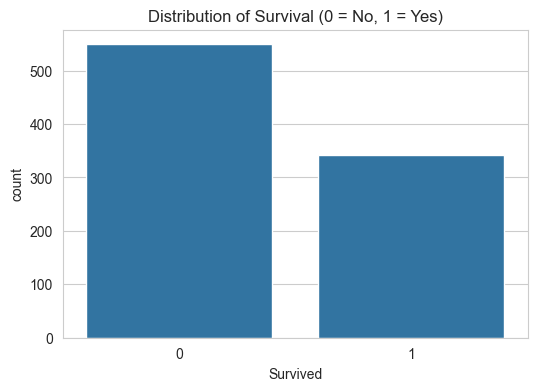

Observation: The majority of passengers did not survive.


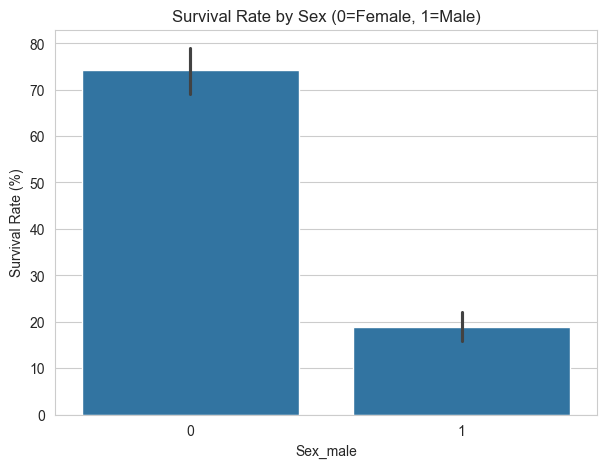

Observation: Females had a significantly higher survival rate than males.


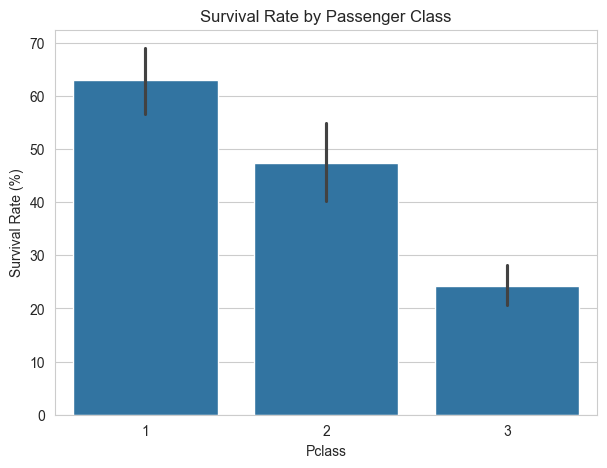

Observation: Passengers in Pclass 1 had a much higher survival rate than those in Pclass 2 or 3.


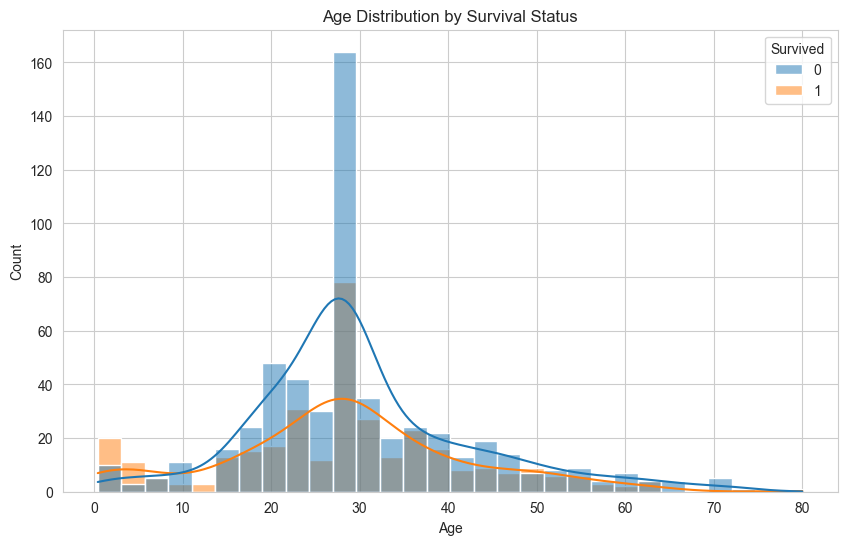

Observation: A higher proportion of younger passengers (especially children) survived. Elderly passengers seem to have a mixed survival rate.


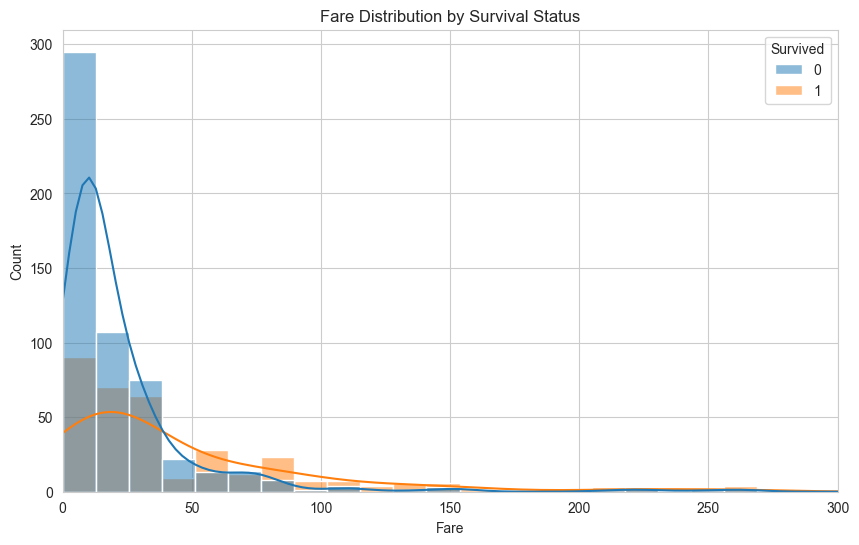

Observation: Passengers who paid higher fares had a higher survival rate. This correlates with Pclass 1 survival.


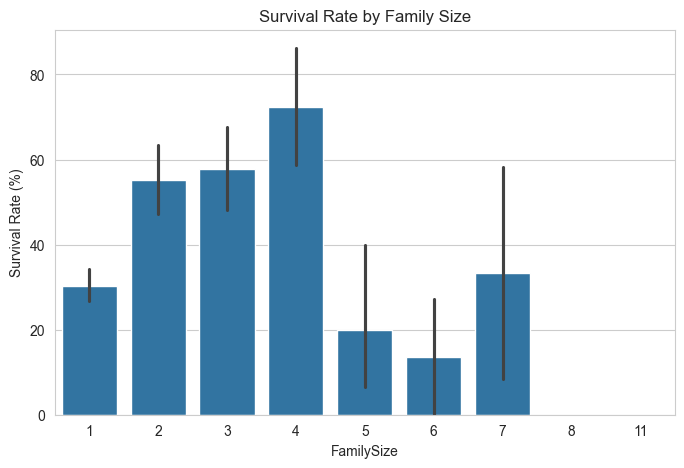

Observation: Passengers with small to medium family sizes (2-4) had better survival rates than those alone or with very large families.


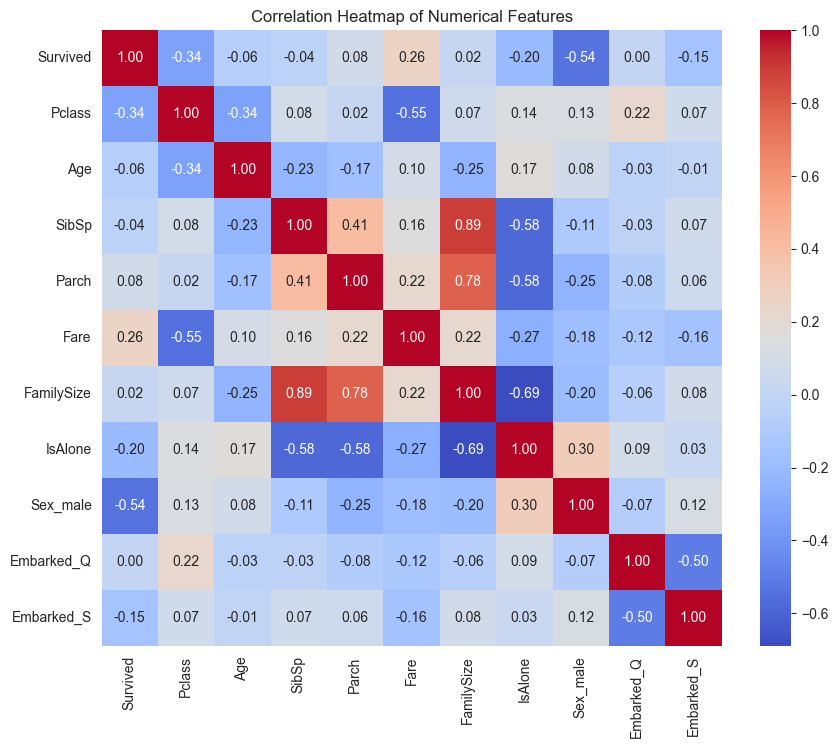


Observation: 'Sex_male' (negative correlation implies males less likely to survive), 'Pclass', 'Fare', and 'IsAlone' show notable correlations with 'Survived'.


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style('whitegrid')

# --- 1. Distribution of 'Survived' (Target Variable) ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_df_cleaned)
plt.title('Distribution of Survival (0 = No, 1 = Yes)')
plt.show()
print("Observation: The majority of passengers did not survive.")

# --- 2. Survival by 'Sex' ---
plt.figure(figsize=(7, 5))
sns.barplot(x='Sex_male', y='Survived', data=train_df_cleaned, estimator=lambda x: sum(x)/len(x) * 100) # Percentage
plt.title('Survival Rate by Sex (0=Female, 1=Male)')
plt.ylabel('Survival Rate (%)')
plt.show()
print("Observation: Females had a significantly higher survival rate than males.")

# --- 3. Survival by 'Pclass' ---
plt.figure(figsize=(7, 5))
sns.barplot(x='Pclass', y='Survived', data=train_df_cleaned, estimator=lambda x: sum(x)/len(x) * 100)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.show()
print("Observation: Passengers in Pclass 1 had a much higher survival rate than those in Pclass 2 or 3.")

# --- 4. Distribution of 'Age' and Survival ---
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df_cleaned, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival Status')
plt.show()
print("Observation: A higher proportion of younger passengers (especially children) survived. Elderly passengers seem to have a mixed survival rate.")

# --- 5. Distribution of 'Fare' and Survival ---
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df_cleaned, x='Fare', hue='Survived', kde=True, bins=40)
plt.title('Fare Distribution by Survival Status')
plt.xlim(0, 300) # Limit x-axis for better visualization of most fares
plt.show()
print("Observation: Passengers who paid higher fares had a higher survival rate. This correlates with Pclass 1 survival.")

# --- 6. Survival by 'FamilySize' ---
plt.figure(figsize=(8, 5))
sns.barplot(x='FamilySize', y='Survived', data=train_df_cleaned, estimator=lambda x: sum(x)/len(x) * 100)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate (%)')
plt.show()
print("Observation: Passengers with small to medium family sizes (2-4) had better survival rates than those alone or with very large families.")

# --- 7. Correlation Heatmap ---
# Select only numerical columns for correlation calculation
numerical_cols = train_df_cleaned.select_dtypes(include=['number']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(train_df_cleaned[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
print("\nObservation: 'Sex_male' (negative correlation implies males less likely to survive), 'Pclass', 'Fare', and 'IsAlone' show notable correlations with 'Survived'.")

Shape of X_train: (712, 10)
Shape of y_train: (712,)
Shape of X_val: (179, 10)
Shape of y_val: (179,)

Random Forest Model trained successfully!

--- Model Evaluation on Validation Set ---
Accuracy: 0.8212

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



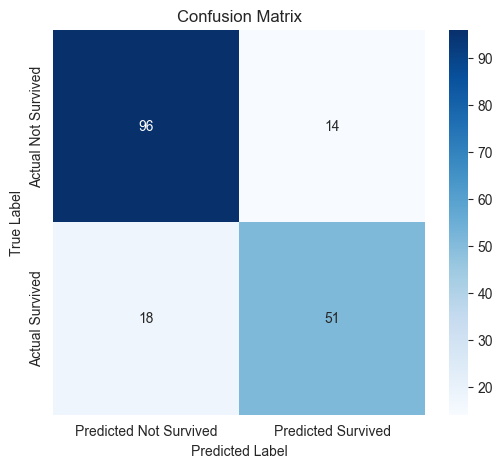


Interpretation of Confusion Matrix:
True Negatives (Correctly predicted 'Not Survived'): 96
False Positives (Incorrectly predicted 'Survived'): 14
False Negatives (Incorrectly predicted 'Not Survived'): 18
True Positives (Correctly predicted 'Survived'): 51


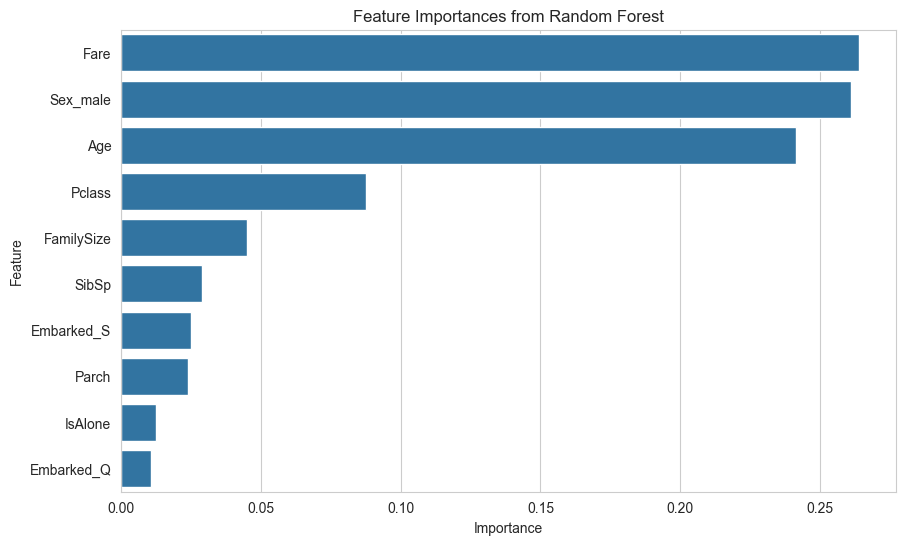


Observation: Feature importances show which features the model weighed most heavily in its predictions.


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target (y)
# 'Survived' is our target variable, all other cleaned columns are features
X = train_df_cleaned.drop('Survived', axis=1)
y = train_df_cleaned['Survived']

# Split the training data into training and validation sets
# We'll use 80% for training and 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y ensures that the proportion of 'Survived' (0s and 1s) is the same in both train and validation sets

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")

# Initialize and train the Random Forest Classifier
# We'll use a random_state for reproducibility
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("\nRandom Forest Model trained successfully!")

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model's performance
print("\n--- Model Evaluation on Validation Set ---")

# Accuracy Score
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (precision, recall, f1-score for each class)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion Matrix (visual representation of predictions vs. actuals)
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Survived', 'Predicted Survived'],
            yticklabels=['Actual Not Survived', 'Actual Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nInterpretation of Confusion Matrix:")
print(f"True Negatives (Correctly predicted 'Not Survived'): {conf_matrix[0, 0]}")
print(f"False Positives (Incorrectly predicted 'Survived'): {conf_matrix[0, 1]}")
print(f"False Negatives (Incorrectly predicted 'Not Survived'): {conf_matrix[1, 0]}")
print(f"True Positives (Correctly predicted 'Survived'): {conf_matrix[1, 1]}")

# Feature Importance (helps understand which features the model found most useful)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
print("\nObservation: Feature importances show which features the model weighed most heavily in its predictions.")

In [19]:
%pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 3.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/11.1 MB 1.6 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/11.1 MB 2.2 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/11.1 MB 2.2 MB/s eta 0:00:05
   --------- ------------------------------ 2.6/11.1 MB 2.4 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.1 MB 2.2 MB/s eta 0:00:04
   ------------ --------------------------- 3.4/11.1 MB 2.2 MB/s eta 0:00:04
   ------------- -------------------------- 3.7/11.1 MB 2.2 MB/s eta 0:00:04
   -------------- ------------------------- 3.9/11.1 MB 2.1 MB/s eta 0:00:04
   --------------- ------------------------ 4.2/11.1 MB 2.0 MB/s eta 0:00:04
   ---------------- ----------------------- 4.5/11.1 MB 1.9 MB/s eta 0:00:04
   ----------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
# Make predictions on the cleaned test data
test_predictions = model.predict(test_df_cleaned)

# Create a DataFrame for submission
# Remember we saved test_passenger_ids earlier
submission_df = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': test_predictions
})

# Display the first few rows of the submission file
print("\nKaggle Submission File Head:")
print(submission_df.head())

# Save the submission file to a CSV
submission_df.to_csv('submission.csv', index=False)
print("\n'submission.csv' created successfully in your project directory.")
print("You can upload this file to Kaggle's Titanic competition page to see your score!")


Kaggle Submission File Head:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         0

'submission.csv' created successfully in your project directory.
You can upload this file to Kaggle's Titanic competition page to see your score!
